In [2]:
import modelbit
mb = modelbit.login()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('laptop_data.csv')

In [5]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [9]:
df.duplicated().sum()

0

In [10]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [11]:
df = df.drop(columns = ['Unnamed: 0'])

In [12]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [13]:
Processors = pd.DataFrame((df['Cpu'].value_counts().index).values, columns = ['Processors'])

In [14]:
# 1. screen size k basis prr
# 2. processors konsi company k hai uske basi prr
# 3. Graphics card k baisis pr 

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [16]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight']= df['Weight'].astype('float32')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


C:\Users\Hp\AppData\Local\Temp\ipykernel_11296\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

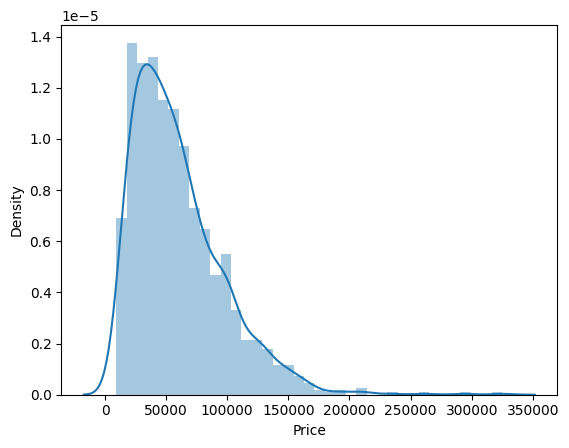

In [18]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

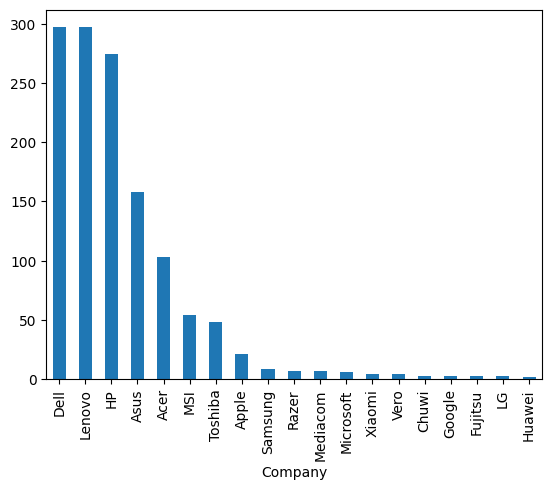

In [19]:
df['Company'].value_counts().plot(kind = 'bar')

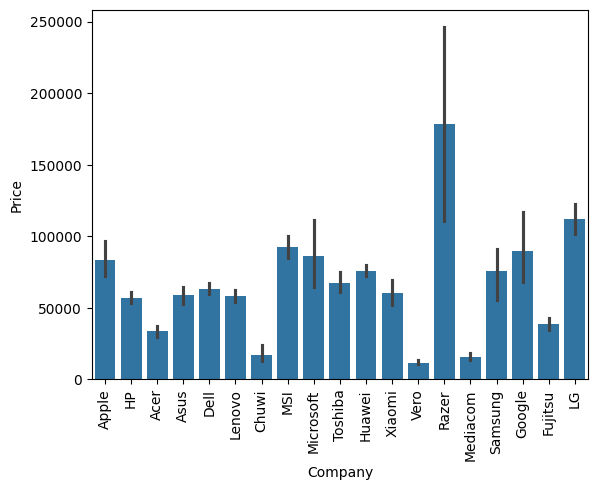

In [20]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')  # it helps to rotate the xlabel vertical
plt.show()

<Axes: xlabel='TypeName'>

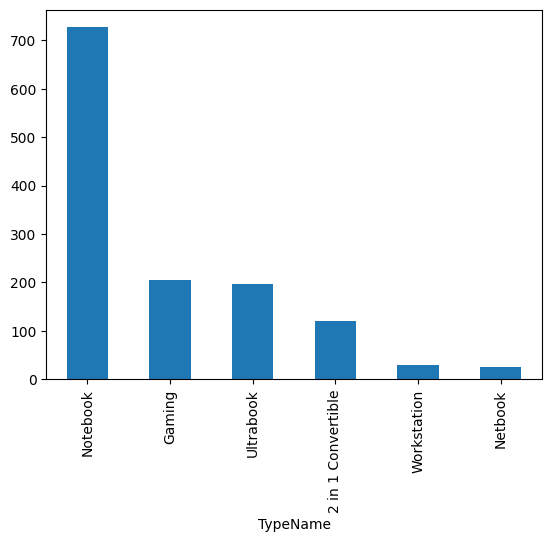

In [21]:
df['TypeName'].value_counts().plot(kind = 'bar')

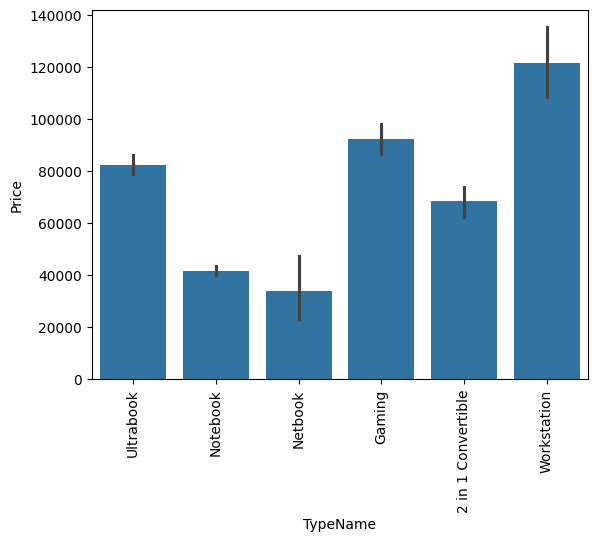

In [22]:
sns.barplot(x= df['TypeName'], y =df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


C:\Users\Hp\AppData\Local\Temp\ipykernel_11296\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

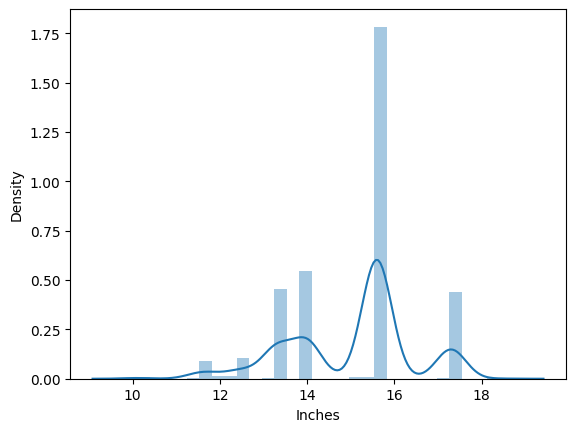

In [24]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

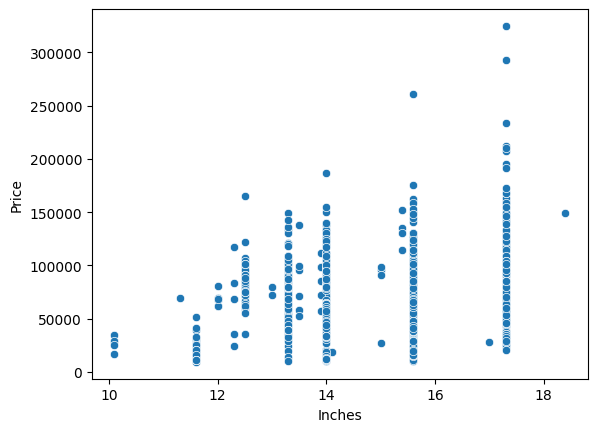

In [25]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [26]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [27]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='TouchScreen', ylabel='Price'>

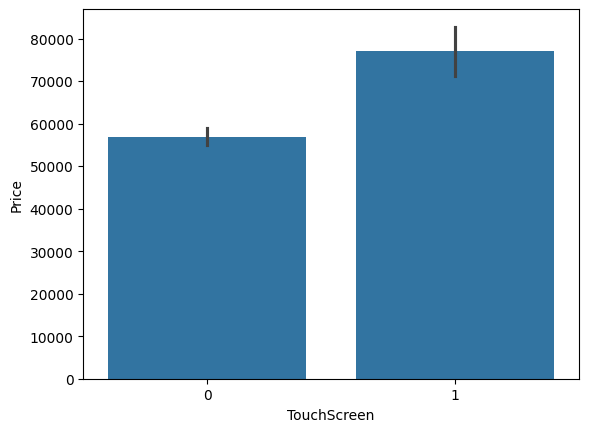

In [28]:
sns.barplot(x = df['TouchScreen'], y = df['Price'])

In [29]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
749,HP,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5 2.9GHz,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,3.00,233845.92,0
1011,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.26,81997.92,0
1149,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.27,124621.92,1
34,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.6GHz,8,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.35,53173.44,0
636,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,99580.32,1


In [30]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

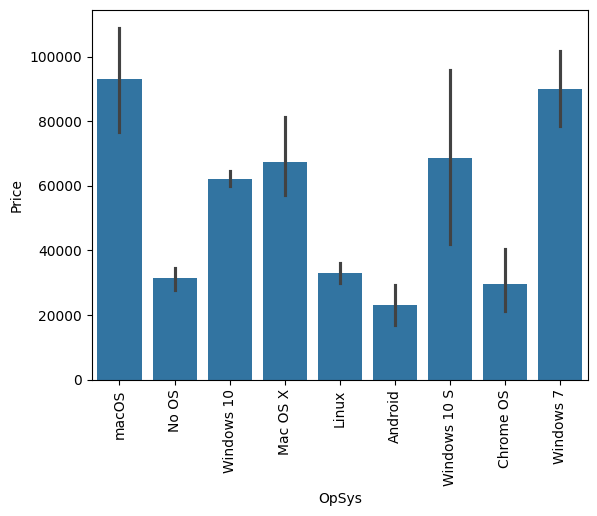

In [31]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

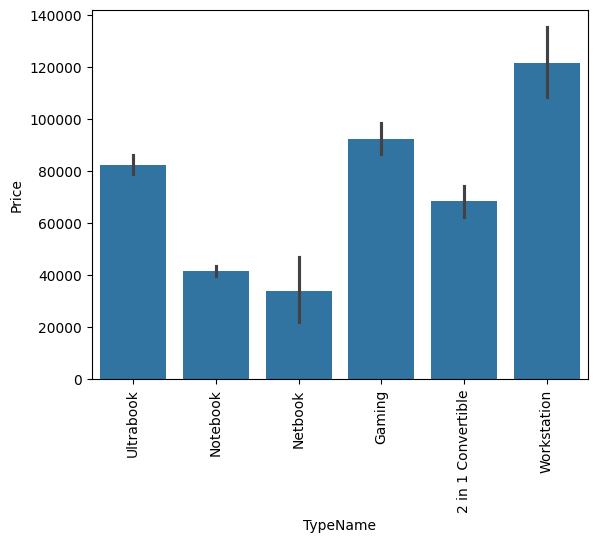

In [32]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [34]:
df['Memory_type'] = df['Memory'].apply(lambda s: s.split()[1])

In [35]:
df['Memory_type'].value_counts()

Memory_type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

<Axes: xlabel='Memory_type', ylabel='Price'>

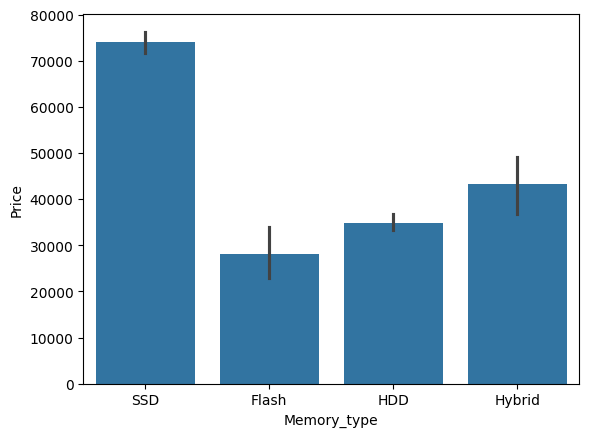

In [36]:
sns.barplot(x = df['Memory_type'], y =df['Price'])

In [37]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0) # function apply mein hi lgta hain

In [38]:
df['Ips'].value_counts()

Ips
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='Ips', ylabel='Price'>

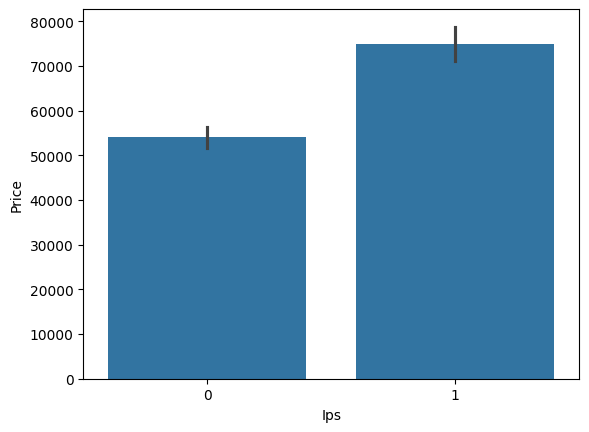

In [39]:
sns.barplot(x = df['Ips'], y = df['Price'])

In [40]:
new = df['ScreenResolution'].str.split('x', n=1,expand = True)

In [41]:
df['X_res']= new[0]
df['Y_res']= new[1]

In [42]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,X_res,Y_res
327,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.7,55938.672,0,SSD,0,Full HD 1920,1080
164,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.1,18541.440,0,HDD,0,1366,768


In [43]:
df['X_res']= df['X_res'].apply(lambda x: x.split()[-1])

In [44]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,X_res,Y_res
327,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,55938.6720,0,SSD,0,1920,1080
570,HP,Workstation,17.3,1600x900,Intel Core i5 7440HQ 2.8GHz,8,500GB HDD,Nvidia Quadro M1200,Windows 10,3.14,99153.5472,0,HDD,0,1600,900


In [45]:
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  Memory_type       1303 non-null   object 
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   int32  
 15  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64

In [47]:
df[['Price', 'Inches', 'Ram', 'X_res', 'TouchScreen','Ips', 'Y_res','Weight']].corr()['Price']

Price          1.000000
Inches         0.068197
Ram            0.743007
X_res          0.556529
TouchScreen    0.191226
Ips            0.252208
Y_res          0.552809
Weight         0.210370
Name: Price, dtype: float64

In [48]:
# ppi = ((X^2+Y^2)^1/2)/Inches  ppi == pixel per inch
df['ppi'] = (((df['X_res']**2 + df['Y_res']**2)**0.5)/df['Inches']).astype('float')

In [49]:
df.sample(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,X_res,Y_res,ppi
554,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,68198.4000,0,HDD,0,1920,1080,127.335675
1154,Dell,Notebook,15.6,IPS Panel Touchscreen / 4K Ultra HD 3840x2160,Intel Core i5 6300HQ 2.3GHz,8,256GB SSD,Nvidia GeForce 960M,Windows 10,2.04,119916.2304,1,SSD,1,3840,2160,282.423996


In [50]:
df[['Price', 'Inches', 'Ram', 'X_res', 'TouchScreen','Ips', 'Y_res','Weight','ppi']].corr()['Price']

Price          1.000000
Inches         0.068197
Ram            0.743007
X_res          0.556529
TouchScreen    0.191226
Ips            0.252208
Y_res          0.552809
Weight         0.210370
ppi            0.473487
Name: Price, dtype: float64

In [51]:
df.drop(columns ='ScreenResolution', inplace = True)

In [52]:
df.drop(columns =['Inches', 'X_res','Y_res'], inplace = True)

In [53]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,SSD,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,Flash,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,SSD,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,SSD,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,SSD,1,226.983005


In [54]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [55]:
df['Cpu_Name2'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [56]:
df['Cpu_Name2'].value_counts()

Cpu_Name2
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          

In [57]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Proceesor'
        else:
            if text.split()[0] == 'AMD':
                return 'AMD Processor'
            else:
                return 'Samsung Processor'

In [58]:
df['Cpu_brand'] = df['Cpu_Name2'].apply(fetch_processor)

<Axes: xlabel='Cpu_brand'>

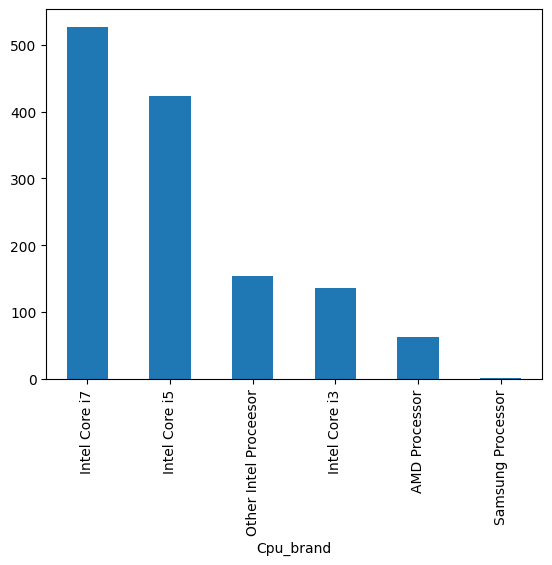

In [59]:
df['Cpu_brand'].value_counts().plot(kind = 'bar')

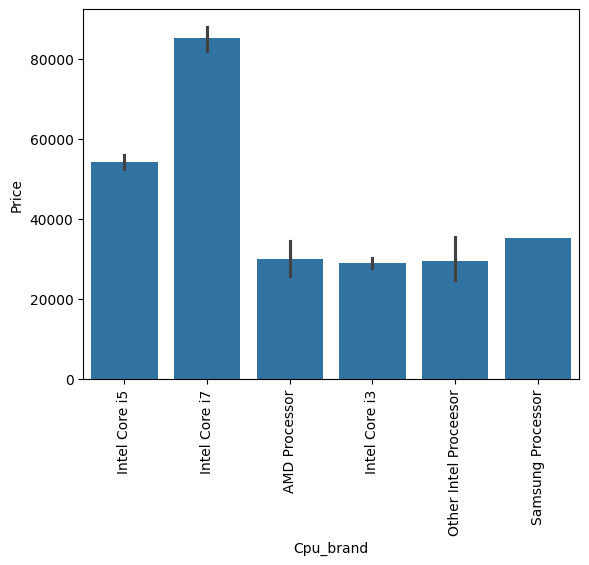

In [60]:
sns.barplot(x=df['Cpu_brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
df.drop(columns = ['Cpu', 'Cpu_Name2'], inplace = True)

In [62]:
df.sample(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,ppi,Cpu_brand
1097,MSI,Gaming,8,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.6,85194.72,0,SSD,0,127.335675,Intel Core i7
241,Asus,Notebook,8,128GB SSD + 1TB HDD,Nvidia GeForce 150MX,Windows 10,2.1,61005.60,0,SSD,0,127.335675,Intel Core i7
371,Acer,Notebook,4,128GB SSD,AMD Radeon R5,Windows 10,2.1,22697.28,0,SSD,0,100.454670,AMD Processor


<Axes: xlabel='Ram'>

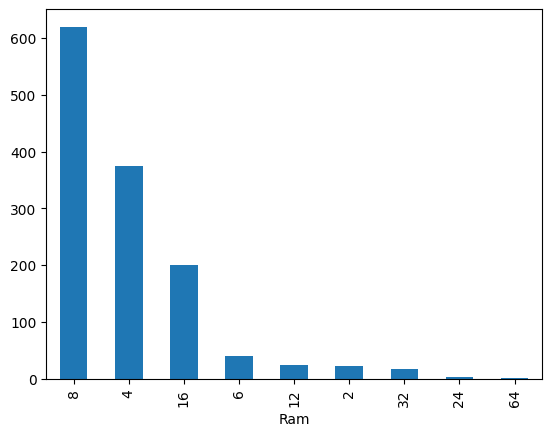

In [63]:
df['Ram'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Ram', ylabel='Price'>

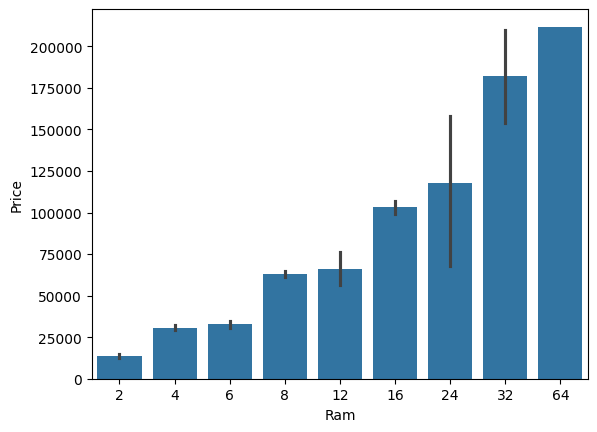

In [64]:
sns.barplot(x = df['Ram'], y =df['Price'])

In [65]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [66]:
df['Memory'].astype(str).replace('\.0', '', regex=True)

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [67]:
df['Memory'] = df['Memory'].astype(str).replace('\.','',regex =True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '')
new = df['Memory'].str.split('+',n=1, expand = True)
df['first'] = new[0]
df['first'] = df['first'].str.strip()      # here strip() function helps to remove the extra space not between the letters but at the starting and ending mein

df['second']= new[1]
df['second'] = df['second'].str.strip()

df['layer1HDD'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['layer1Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace = True)
df['layer2HDD'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['layer2SSD'] = df['second'].apply(lambda x:1 if 'SSD' in x else 0)
df['layer2Hybrid'] = df['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['layer2Flash_Storage'] = df['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['second'].fillna('0', inplace =True )

df['second'] = df['second'].str.replace(r'\D', '')
df['second'] = df['second'].str.replace(r'\D', '', regex=True)
df['second'] = df['second'].replace('', '0')
df['first'] =df['first'].astype('int32')
df['second'] = df['second'].astype('int32')

df['HDD'] = (df['first']*df['layer1HDD']+df['second']*df['layer2HDD'])
df['SSD'] = (df['first']*df['layer1SSD']+df['second']*df['layer2SSD'])
df['Hybrid'] = (df['first']*df['layer1Hybrid']+df['second']*df['layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['layer1Flash_Storage']+df['second']*df['layer2Flash_Storage'])

df.drop(columns = ['first','second', 'layer1HDD', 'layer1SSD', 'layer1Hybrid','layer1Flash_Storage',
                  'layer2SSD', 'layer2HDD', 'layer2Hybrid','layer2Flash_Storage'], inplace = True)


In [68]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,SSD,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,Flash,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,SSD,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,SSD,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,SSD,1,226.983005,Intel Core i5,0,256,0,0


In [69]:
df.drop(columns = 'Memory', inplace = True)

In [70]:
df[['Ram', 'Weight', 'TouchScreen', 'Ips', 'ppi','HDD','SSD','Flash_Storage','Price','Hybrid']].corr()['Price']

Ram              0.743007
Weight           0.210370
TouchScreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.234935
SSD              0.547358
Flash_Storage   -0.040511
Price            1.000000
Hybrid          -0.004244
Name: Price, dtype: float64

In [71]:
df.drop(columns = ['Flash_Storage','Hybrid'], inplace = True)

In [72]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,ppi,Cpu_brand,HDD,SSD
982,Lenovo,Notebook,6,AMD Radeon 530,Windows 10,2.20,29250.72,0,SSD,0,141.211998,AMD Processor,0,256
1000,Acer,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.70,67132.80,0,SSD,1,141.211998,Intel Core i7,1,128
549,Lenovo,Notebook,8,Intel HD Graphics 620,Windows 10,1.99,92121.12,0,SSD,1,141.211998,Intel Core i7,0,512
872,Toshiba,Notebook,8,Intel HD Graphics 620,Windows 10,2.00,73952.64,0,SSD,1,141.211998,Intel Core i7,0,256
188,Acer,Ultrabook,8,Intel HD Graphics 615,Windows 10,1.12,52693.92,0,SSD,1,165.632118,Intel Core i5,0,256


In [73]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [74]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [75]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,SSD,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,Flash,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,SSD,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,SSD,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,SSD,1,226.983005,Intel Core i5,0,256,Intel


<Axes: xlabel='Gpu_brand'>

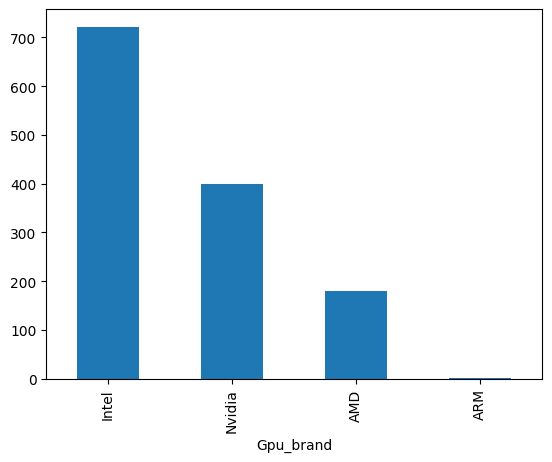

In [76]:
df['Gpu_brand'].value_counts().plot(kind = 'bar')

<Axes: xlabel='Gpu_brand', ylabel='Price'>

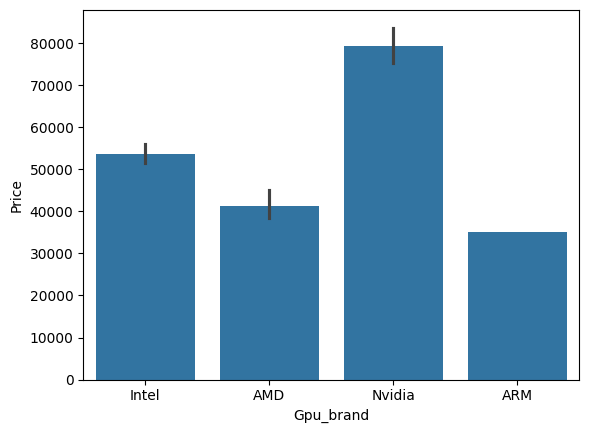

In [77]:
sns.barplot(x = df['Gpu_brand'], y = df['Price'])

In [78]:
df = df[df['Gpu_brand'] != 'ARM']

In [79]:
df['Gpu_brand'].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [80]:
df.drop(columns = 'Gpu', inplace = True)

In [81]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,Memory_type,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,SSD,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,Flash,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,SSD,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,SSD,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,SSD,1,226.983005,Intel Core i5,0,256,Intel


In [82]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

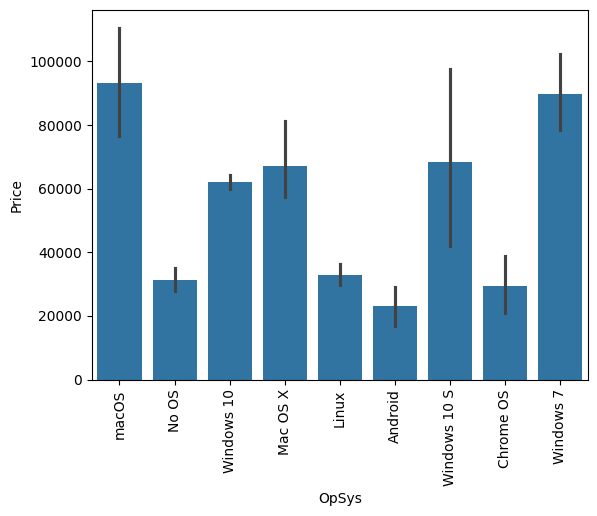

In [83]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [84]:
def cat(inp):
    if inp == 'Windows 7' or inp == 'Windows 10 S' or inp == 'Windows 10':
        return 'Windows'
    else:
        if inp == 'macoOS' or inp == 'Mac OS X':
            return 'Mac'
        else:
            return 'Linux/NO OS/Android/Chrome'

In [85]:
df['OpSys'] = df['OpSys'].apply(cat)

In [86]:
df['OpSys'].value_counts()

OpSys
Windows                       1125
Linux/NO OS/Android/Chrome     169
Mac                              8
Name: count, dtype: int64

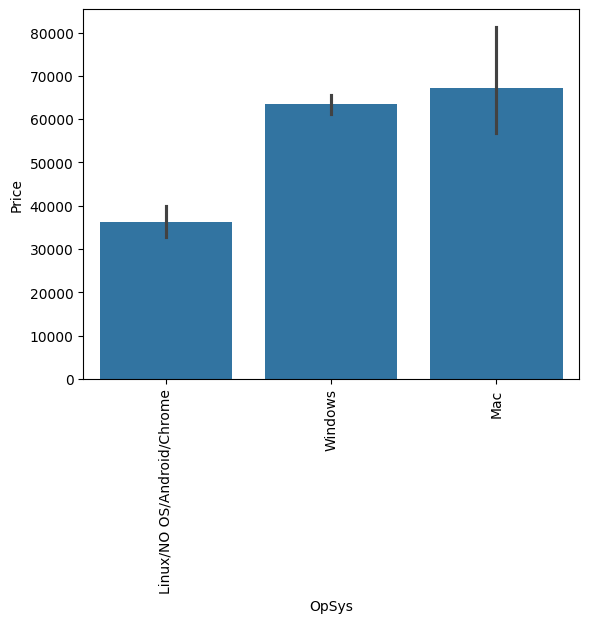

In [87]:
sns.barplot(x = df['OpSys'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_11296\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

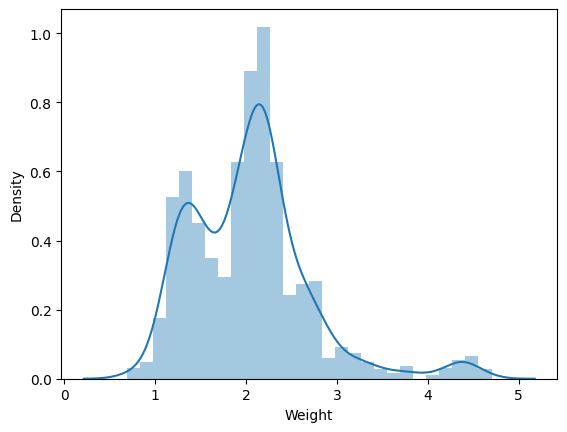

In [88]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

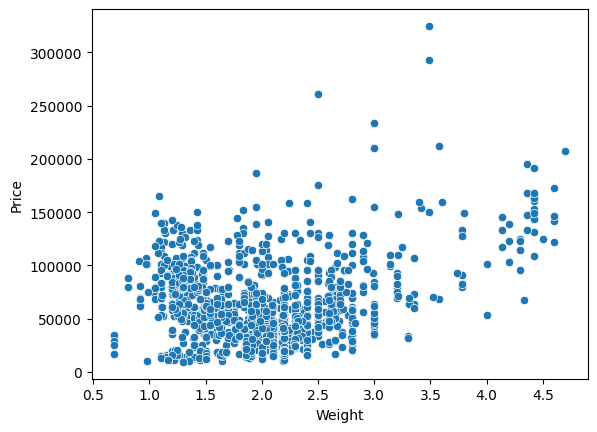

In [89]:
sns.scatterplot(x = df['Weight'] , y = df['Price'])

<Axes: >

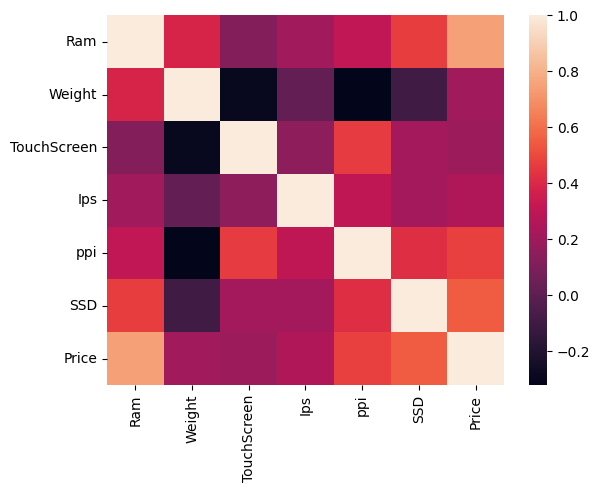

In [96]:
sns.heatmap(df[['Ram', 'Weight', 'TouchScreen', 'Ips', 'ppi','SSD','Price']].corr())

In [97]:
df[['Ram', 'Weight', 'TouchScreen', 'Ips', 'ppi','SSD','Price']].corr()['Price'].sort_values(ascending = False)

Price          1.000000
Ram            0.742905
SSD            0.547147
ppi            0.475368
Ips            0.253320
Weight         0.209867
TouchScreen    0.192917
Name: Price, dtype: float64

C:\Users\Hp\AppData\Local\Temp\ipykernel_11296\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

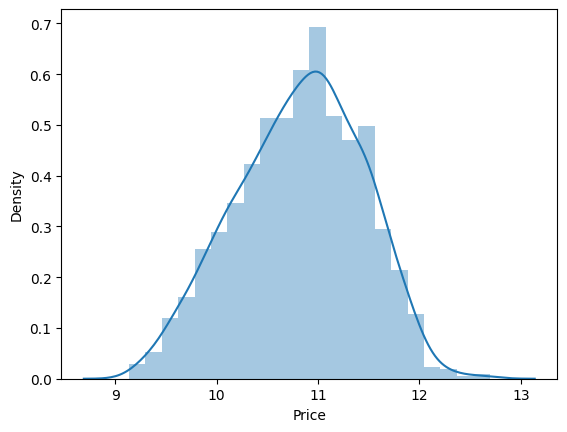

In [98]:
sns.distplot(np.log(df['Price']))

In [100]:
X =df.drop(columns = 'Price')
y = np.log(df['Price'])

In [140]:
np.exp(y)

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1302, dtype: float64

In [101]:
X

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,Memory_type,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Linux/NO OS/Android/Chrome,1.37,0,SSD,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Linux/NO OS/Android/Chrome,1.34,0,Flash,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Linux/NO OS/Android/Chrome,1.86,0,SSD,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Linux/NO OS/Android/Chrome,1.83,0,SSD,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Linux/NO OS/Android/Chrome,1.37,0,SSD,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,1,SSD,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,1,SSD,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Windows,1.50,0,Flash,0,111.935204,Other Intel Proceesor,0,0,Intel
1301,HP,Notebook,6,Windows,2.19,0,HDD,0,100.454670,Intel Core i7,1,0,AMD


In [102]:
X.drop(columns = 'Memory_type', inplace = True)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041 entries, 147 to 1126
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1041 non-null   object 
 1   TypeName     1041 non-null   object 
 2   Ram          1041 non-null   int32  
 3   OpSys        1041 non-null   object 
 4   Weight       1041 non-null   float32
 5   TouchScreen  1041 non-null   int64  
 6   Ips          1041 non-null   int64  
 7   ppi          1041 non-null   float64
 8   Cpu_brand    1041 non-null   object 
 9   HDD          1041 non-null   int64  
 10  SSD          1041 non-null   int64  
 11  Gpu_brand    1041 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(4), object(5)
memory usage: 97.6+ KB


In [105]:
X_train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,Ips,ppi,Cpu_brand,HDD,SSD,Gpu_brand
147,Asus,Notebook,4,Windows,2.00,0,0,141.211998,Other Intel Proceesor,1,0,Intel
342,HP,Notebook,8,Windows,2.10,0,1,141.211998,Intel Core i3,1,0,Nvidia
1003,HP,Notebook,4,Windows,1.64,0,0,111.935204,Intel Core i5,500,0,Intel
814,Dell,Notebook,8,Windows,2.18,0,0,141.211998,Intel Core i5,0,256,AMD
344,Dell,Ultrabook,8,Windows,1.20,0,0,165.632118,Intel Core i7,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,8,Windows,2.40,0,0,141.211998,Intel Core i5,1,256,Nvidia
1130,HP,Notebook,8,Windows,2.04,0,0,100.454670,Intel Core i7,2,0,Intel
1295,Dell,Notebook,8,Linux/NO OS/Android/Chrome,2.30,0,0,100.454670,Intel Core i7,1,0,AMD
860,Lenovo,Notebook,8,Windows,2.30,0,1,141.211998,Intel Core i5,1,0,Intel


In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [107]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor

# LinearRegression

In [108]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8077121286061046
0.2146858027225388


# RidgeRegression

In [109]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = Ridge(alpha = 0.2) # at this alpha we get the best regression result

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8078313844841151
0.21478375776630765


# LassoRegression

In [110]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = Lasso(alpha = 0.0001) # lasso perform the L1 regularization

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8076903662757133
0.21489499663217587


# KneighborsRegressor

In [111]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors = 2) 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.769271568643154
0.21622253234545175


# DecisionTreeRegressor

In [112]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = DecisionTreeRegressor(min_samples_split=3) 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8267491504644103
0.18406644277643452


# SupportVectorRegressor

In [113]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = SVR(degree=6,C=1000,epsilon=0.2) 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.7991435328091119
0.219774009445922


# RandomForest

In [114]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = RandomForestRegressor() 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8719019940084254
0.1675310650144635


# AdaBoost

In [115]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.7479153810923663
0.25800576609556497


# ExtraTreesRegressor

In [116]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=200)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8570254327661785
0.17390050797814166


# Gradient Boost

In [117]:
step1 = ColumnTransformer(transformers = [('Cat', OneHotEncoder(sparse_output= False, drop = 'first'), [0,1,3,8,11])], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500 )

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.869687765217248
0.17098134525305136


# VotingRegressor

In [136]:
from sklearn.ensemble import VotingRegressor , StackingRegressor

step1 = ColumnTransformer(transformers = [
    ('ohe', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,3,8,11])
], remainder = 'passthrough')

dt = DecisionTreeRegressor(min_samples_split=3)
# xgb =XGBRegressor()
gbr = GradientBoostingRegressor(n_estimators=500 )
Etr = ExtraTreesRegressor(n_estimators=200)
rf = RandomForestRegressor()

step2 = VotingRegressor([('dt',dt), ('gbr', gbr),('Etr', Etr), ('rf', rf)],weights=[1,5,2,7], verbose = True) 

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

def Laptop_price_prediction(Company, TypeName, Ram, OpSys, Weight, TouchScreen, Ips, ppi, Cpu_brand, HDD, SSD, Gpu_brand):
    input_data = pd.DataFrame([{
        "Company": Company,
        "TypeName": TypeName,
        "Ram": Ram,
        "OpSys": OpSys,
        "Weight": Weight,
        "TouchScreen": TouchScreen,
        "Ips": Ips,
        "ppi": ppi,
        "Cpu_brand": Cpu_brand,
        "HDD": HDD,
        "SSD": SSD,
        "Gpu_brand": Gpu_brand
    }])
    
    return np.exp(pipe.predict(input_data))
    

[Voting] ....................... (1 of 4) Processing dt, total=   0.0s
[Voting] ...................... (2 of 4) Processing gbr, total=   0.7s
[Voting] ...................... (3 of 4) Processing Etr, total=   1.0s
[Voting] ....................... (4 of 4) Processing rf, total=   0.6s
0.8845276531590467
0.15942841459429533


# Stacking Regressor

In [121]:
from sklearn.ensemble import VotingRegressor , StackingRegressor

step1 = ColumnTransformer(transformers = [
    ('ohe', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,3,8,11])
], remainder = 'passthrough')

dt = DecisionTreeRegressor(min_samples_split=3)
# xgb =XGBRegressor()
gbr = GradientBoostingRegressor(n_estimators=500 )
Etr = ExtraTreesRegressor(n_estimators=200)
rf = RandomForestRegressor()

step2 = StackingRegressor([('dt',dt), ('gbr', gbr),('Etr', Etr), ('rf', rf)],final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.8797943130006921
0.16608857311435296


# This is the deployed model and it has been analyzed through all the regressor and then finally voting regressor has been chosen to deploy

In [137]:
mb.deploy(Laptop_price_prediction)

Encrypting 'pipe': 100%|███████████████████████████████████████████████████████████| 34.7M/34.7M [00:00<00:00, 124MB/s]


In [141]:
import requests
import json

url = "https://pankajjangid.us-east-1.aws.modelbit.com/v1/Laptop_price_prediction/latest"
headers = {
    'Content-Type': 'application/json'
}
data = {
    "data": ["Apple", "Ultrabook", 8, "Linux/NO OS/Android/Chrome", 1.37, 0, 1, 226.983005, "Intel Core i5", 0, 128, "Intel"]
}

response = requests.post(url, headers=headers, json=data)
response_json = response.json()

print(json.dumps(response_json, indent=4))

{
    "data": [
        73114.43689162971
    ]
}


In [135]:
modelbit.get_inference(
  region="us-east-1.aws",
  workspace="pankajjangid",
  deployment="Laptop_price_prediction",
  data=["Asus", "Notebook", 4, "Windows", 2.00, 0, 0, 141.211998, "Intel Core i7", 1, 0, "Intel"]
)

{'data': [10.593753222407862]}